In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import gc
#######################################################
# reduced number of words to 7000, from 10000, to speed training
# (train_data, train_labels), _ = imdb.load_data(num_words=10000)
# changed vectorize_squences to 5000 as well
# def vectorize_sequences(sequences, dimension=10000):

In [15]:
(train_data, train_labels), _ = imdb.load_data(num_words=7000)

def vectorize_sequences(sequences, dimension=7000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)


In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6871 - loss: 0.6233 - val_accuracy: 0.8514 - val_loss: 0.4374
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8795 - loss: 0.3846 - val_accuracy: 0.8687 - val_loss: 0.3384
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9027 - loss: 0.2812 - val_accuracy: 0.8746 - val_loss: 0.3111
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9242 - loss: 0.2217 - val_accuracy: 0.8870 - val_loss: 0.2837
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9327 - loss: 0.1928 - val_accuracy: 0.8856 - val_loss: 0.2816
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9444 - loss: 0.1647 - val_accuracy: 0.8824 - val_loss: 0.2923
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9535 - loss: 0.1407 - val_accuracy: 0.8815 - val_loss: 0.2939
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9600 - loss: 0.1259 - val_accuracy: 0.8806 - v

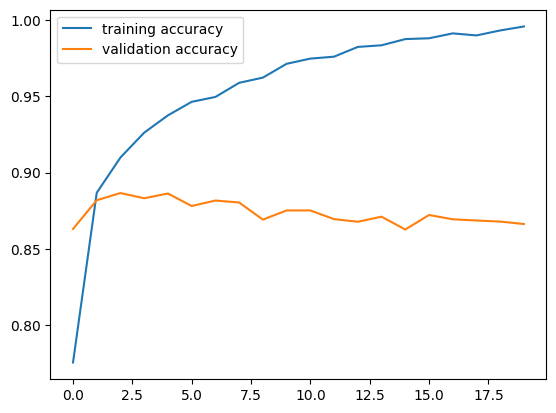

In [5]:
# code to plot the loss and accuracy goes here
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [17]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history2 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6669 - loss: 0.6368 - val_accuracy: 0.8421 - val_loss: 0.5062
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8676 - loss: 0.4650 - val_accuracy: 0.8659 - val_loss: 0.4041
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9013 - loss: 0.3530 - val_accuracy: 0.8840 - val_loss: 0.3410
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9210 - loss: 0.2851 - val_accuracy: 0.8854 - val_loss: 0.3062
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9299 - loss: 0.2420 - val_accuracy: 0.8859 - val_loss: 0.2962
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9400 - loss: 0.2010 - val_accuracy: 0.8805 - val_loss: 0.2943
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9393 - loss: 0.1886 - val_accuracy: 0.8882 - val_loss: 0.2809
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9508 - loss: 0.1654 - val_accuracy: 0.8881 - v

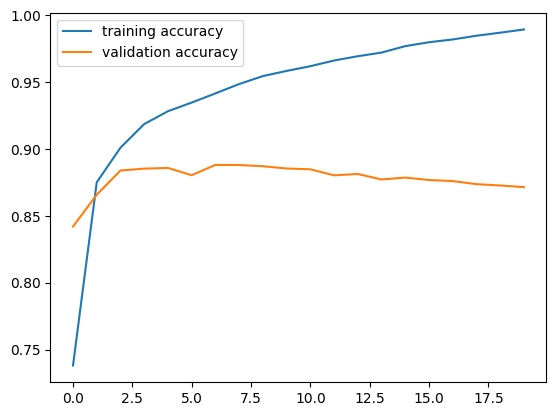

In [18]:
# code to plot the loss and accuracy goes here
plt.plot(history2.history['accuracy'], label='training accuracy')
plt.plot(history2.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [20]:
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history3 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6224 - loss: 2.3148 - val_accuracy: 0.7517 - val_loss: 0.8606
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8035 - loss: 0.8233 - val_accuracy: 0.8416 - val_loss: 0.7725
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8282 - loss: 0.7598 - val_accuracy: 0.7953 - val_loss: 0.7669
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8314 - loss: 0.7197 - val_accuracy: 0.8304 - val_loss: 0.7161
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8438 - loss: 0.6934 - val_accuracy: 0.8352 - val_loss: 0.7000
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8570 - loss: 0.6619 - val_accuracy: 0.8517 - val_loss: 0.6612
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8625 - loss: 0.6403 - val_accuracy: 0.8523 - val_loss: 0.6466
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8631 - loss: 0.6270 - val_accuracy: 0.8469 - v

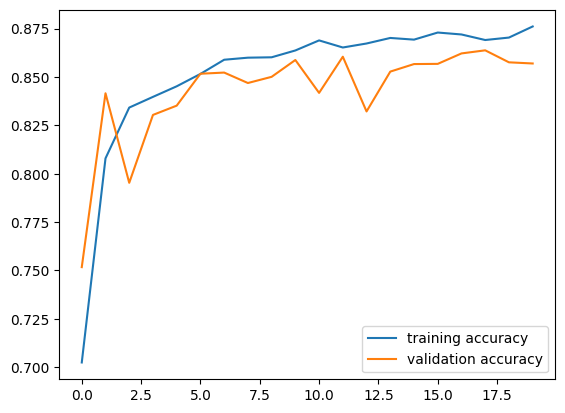

In [21]:
# code to plot the loss and accuracy goes here
plt.plot(history3.history['accuracy'], label='training accuracy')
plt.plot(history3.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6289 - loss: 0.7332 - val_accuracy: 0.8488 - val_loss: 0.5504
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8679 - loss: 0.4997 - val_accuracy: 0.8722 - val_loss: 0.4280
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8989 - loss: 0.3784 - val_accuracy: 0.8425 - val_loss: 0.4378
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9103 - loss: 0.3294 - val_accuracy: 0.8801 - val_loss: 0.3672
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9249 - loss: 0.2899 - val_accuracy: 0.8808 - val_loss: 0.3577
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9341 - loss: 0.2675 - val_accuracy: 0.8862 - val_loss: 0.3466
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9416 - loss: 0.2503 - val_accuracy: 0.8849 - val_loss: 0.3487
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9461 - loss: 0.2387 - val_accuracy: 0.8845 - v

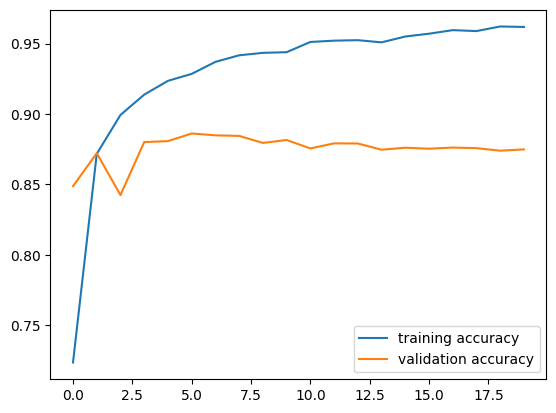

In [22]:
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history4 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

# code to plot the loss and accuracy goes here
plt.plot(history4.history['accuracy'], label='training accuracy')
plt.plot(history4.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6061 - loss: 1.5988 - val_accuracy: 0.7022 - val_loss: 0.7605
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7886 - loss: 0.7291 - val_accuracy: 0.8381 - val_loss: 0.6867
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8344 - loss: 0.6664 - val_accuracy: 0.8478 - val_loss: 0.6370
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8518 - loss: 0.6162 - val_accuracy: 0.8473 - val_loss: 0.6073
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8567 - loss: 0.5792 - val_accuracy: 0.8557 - val_loss: 0.5775
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8687 - loss: 0.5491 - val_accuracy: 0.8598 - val_loss: 0.5543
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8698 - loss: 0.5353 - val_accuracy: 0.8511 - val_loss: 0.5550
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8693 - loss: 0.5251 - val_accuracy: 0.8604 - v

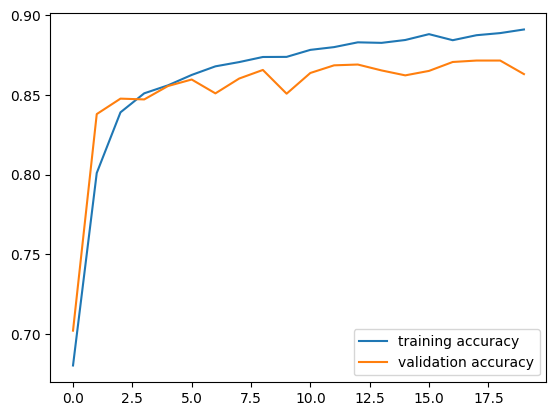

In [23]:
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history5 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

# code to plot the loss and accuracy goes here
plt.plot(history5.history['accuracy'], label='training accuracy')
plt.plot(history5.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5637 - loss: 0.6697 - val_accuracy: 0.8489 - val_loss: 0.5222
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7356 - loss: 0.5381 - val_accuracy: 0.8723 - val_loss: 0.4139
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8015 - loss: 0.4518 - val_accuracy: 0.8804 - val_loss: 0.3461
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8434 - loss: 0.3836 - val_accuracy: 0.8842 - val_loss: 0.3102
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8686 - loss: 0.3442 - val_accuracy: 0.8877 - val_loss: 0.2862
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8849 - loss: 0.3090 - val_accuracy: 0.8861 - val_loss: 0.2797
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9062 - loss: 0.2660 - val_accuracy: 0.8848 - val_loss: 0.2887
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9154 - loss: 0.2436 - val_accuracy: 0.8901 - v

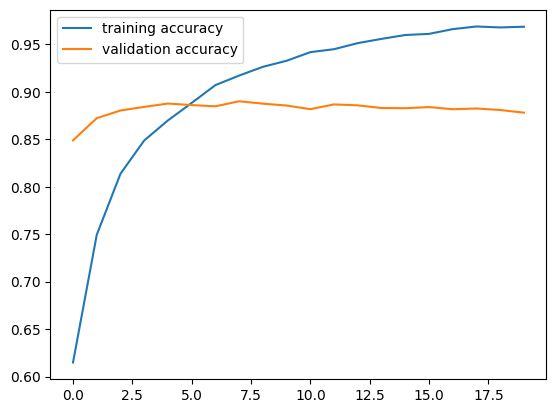

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history6 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

# code to plot the loss and accuracy goes here
plt.plot(history6.history['accuracy'], label='training accuracy')
plt.plot(history6.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5456 - loss: 0.6872 - val_accuracy: 0.8445 - val_loss: 0.4732
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8662 - loss: 0.4155 - val_accuracy: 0.8824 - val_loss: 0.3313
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9062 - loss: 0.2674 - val_accuracy: 0.8806 - val_loss: 0.3088
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9279 - loss: 0.1895 - val_accuracy: 0.8769 - val_loss: 0.3063
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9556 - loss: 0.1347 - val_accuracy: 0.8802 - val_loss: 0.3122
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9700 - loss: 0.0940 - val_accuracy: 0.8781 - val_loss: 0.3723
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9782 - loss: 0.0720 - val_accuracy: 0.8727 - val_loss: 0.4067
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9856 - loss: 0.0516 - val_accuracy: 0.8747 - v

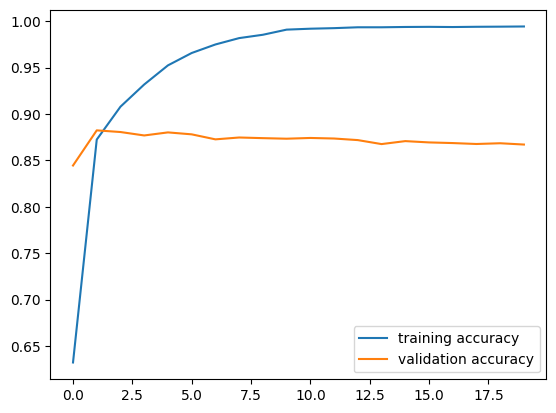

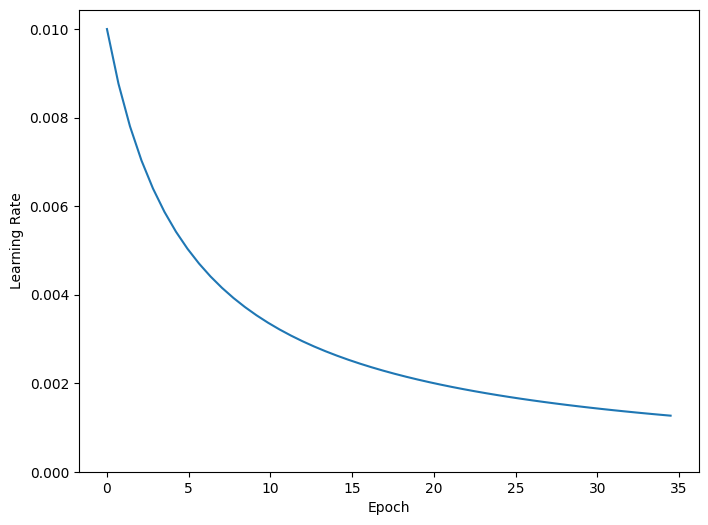

In [25]:
N_TRAIN = int(len(train_data) * 0.6)  # size of training data with 60/40% validation split
BATCH_SIZE = 512
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.01,
  decay_steps=STEPS_PER_EPOCH*5,
  decay_rate=1,
  staircase=False)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=lr_schedule),
              loss="binary_crossentropy",
              metrics=["accuracy"])

history7 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

plt.plot(history7.history['accuracy'], label='training accuracy')
plt.plot(history7.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

step = np.linspace(0,1000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

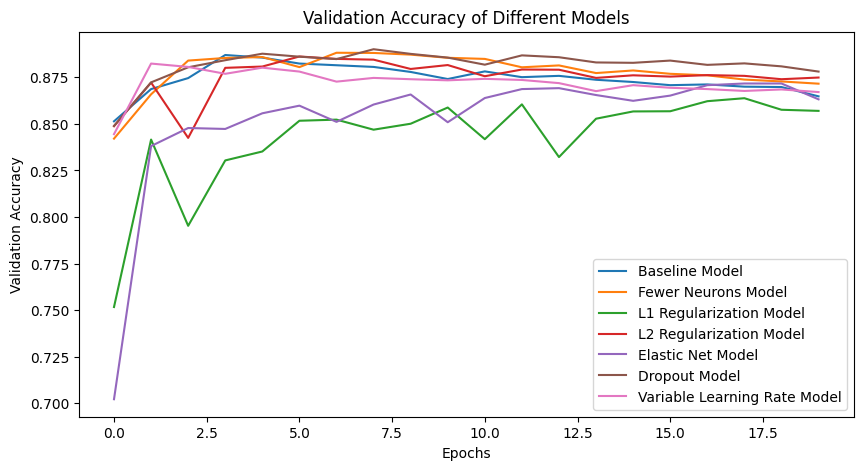

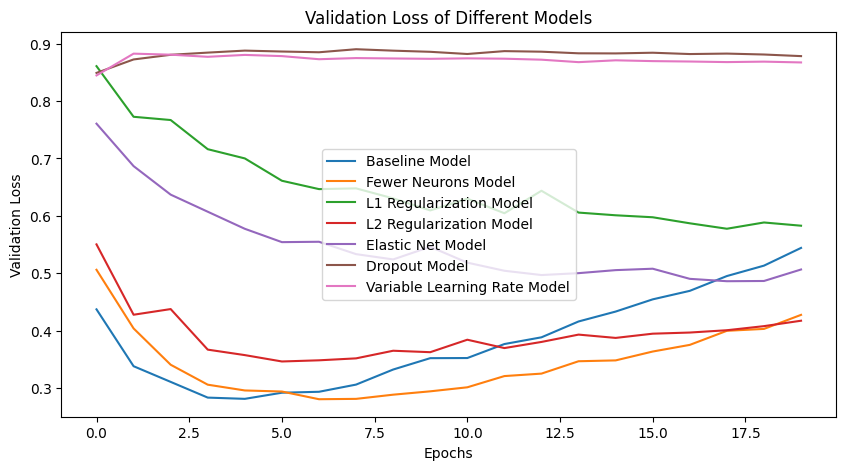

In [28]:
# Plot all models' validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'], label='Baseline Model')
plt.plot(history2.history['val_accuracy'], label='Fewer Neurons Model')
plt.plot(history3.history['val_accuracy'], label='L1 Regularization Model')
plt.plot(history4.history['val_accuracy'], label='L2 Regularization Model')
plt.plot(history5.history['val_accuracy'], label='Elastic Net Model')
plt.plot(history6.history['val_accuracy'], label='Dropout Model')
plt.plot(history7.history['val_accuracy'], label='Variable Learning Rate Model')
plt.legend()
plt.title('Validation Accuracy of Different Models')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

# Plot all models' validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='Baseline Model')
plt.plot(history2.history['val_loss'], label='Fewer Neurons Model')
plt.plot(history3.history['val_loss'], label='L1 Regularization Model')
plt.plot(history4.history['val_loss'], label='L2 Regularization Model')
plt.plot(history5.history['val_loss'], label='Elastic Net Model')
plt.plot(history6.history['val_accuracy'], label='Dropout Model')
plt.plot(history7.history['val_accuracy'], label='Variable Learning Rate Model')
plt.legend()
plt.title('Validation Loss of Different Models')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.6954 - loss: 0.5868 - val_accuracy: 0.8320 - val_loss: 0.3956
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8757 - loss: 0.3226 - val_accuracy: 0.8879 - val_loss: 0.2917
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9211 - loss: 0.2269 - val_accuracy: 0.8599 - val_loss: 0.3396
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9282 - loss: 0.1964 - val_accuracy: 0.8886 - val_loss: 0.2821
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9442 - loss: 0.1589 - val_accuracy: 0.8810 - val_loss: 0.3042
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9528 - loss: 0.1358 - val_accuracy: 0.8441 - val_loss: 0.4243
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9595 - loss: 0.1203 - val_accuracy: 0.8803 - val_loss: 0.3303
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9689 - loss: 0.0908 - val_accuracy: 0.8793 - 

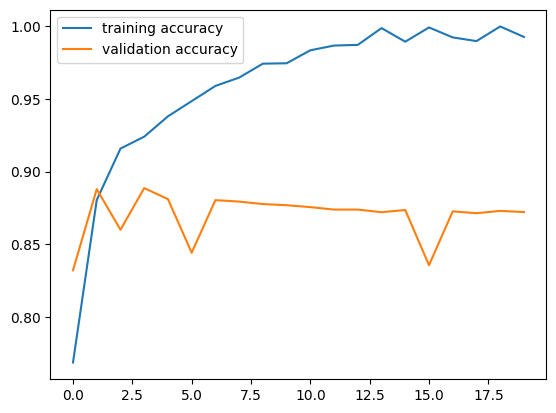

In [29]:
# more neurons model

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

# code to plot the loss and accuracy goes here
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6686 - loss: 0.6575 - val_accuracy: 0.8334 - val_loss: 0.5611
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8523 - loss: 0.5324 - val_accuracy: 0.8554 - val_loss: 0.4780
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8808 - loss: 0.4442 - val_accuracy: 0.8662 - val_loss: 0.4153
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8915 - loss: 0.3812 - val_accuracy: 0.8638 - val_loss: 0.3791
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8952 - loss: 0.3326 - val_accuracy: 0.8776 - val_loss: 0.3380
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9080 - loss: 0.2927 - val_accuracy: 0.8816 - val_loss: 0.3187
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9153 - loss: 0.2583 - val_accuracy: 0.8831 - val_loss: 0.3002
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9274 - loss: 0.2336 - val_accuracy: 0.8849 - v

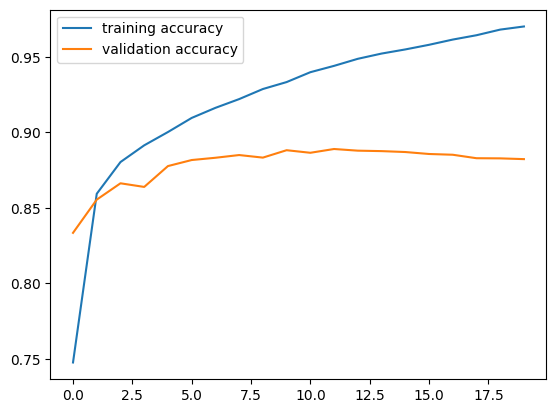

In [30]:
# fewer neurons model

model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

# code to plot the loss and accuracy goes here
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.5455 - loss: 0.7275 - val_accuracy: 0.8307 - val_loss: 0.6556
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6920 - loss: 0.6528 - val_accuracy: 0.8448 - val_loss: 0.5466
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7692 - loss: 0.5679 - val_accuracy: 0.8718 - val_loss: 0.4626
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8130 - loss: 0.4994 - val_accuracy: 0.8786 - val_loss: 0.4114
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8511 - loss: 0.4441 - val_accuracy: 0.8802 - val_loss: 0.3680
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8633 - loss: 0.4120 - val_accuracy: 0.8822 - val_loss: 0.3484
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8913 - loss: 0.3676 - val_accuracy: 0.8884 - val_loss: 0.3375
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9019 - loss: 0.3404 - val_accuracy: 0.8827 - v

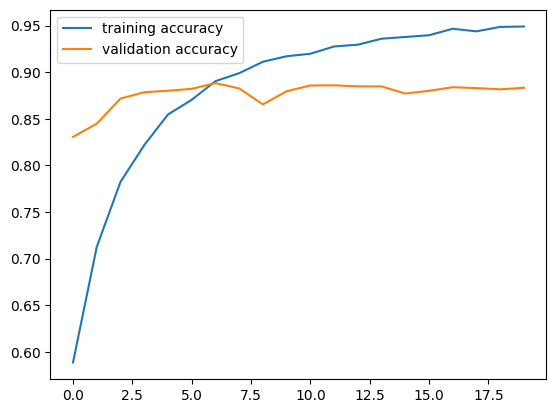

In [31]:
# dropout + L2 model

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

# code to plot the loss and accuracy goes here
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5860 - loss: 0.8172 - val_accuracy: 0.7057 - val_loss: 0.6406
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7620 - loss: 0.5077 - val_accuracy: 0.7905 - val_loss: 0.5628
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8317 - loss: 0.3939 - val_accuracy: 0.8317 - val_loss: 0.4841
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8632 - loss: 0.3334 - val_accuracy: 0.8704 - val_loss: 0.4037
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8978 - loss: 0.2714 - val_accuracy: 0.8750 - val_loss: 0.3559
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9069 - loss: 0.2540 - val_accuracy: 0.8762 - val_loss: 0.3214
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9224 - loss: 0.2212 - val_accuracy: 0.8784 - val_loss: 0.3071
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9287 - loss: 0.2028 - val_accuracy: 0.8773 - v

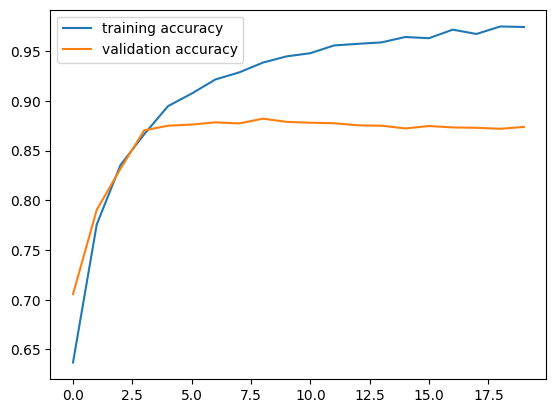

In [32]:
# dropout + batchnorm model

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

# code to plot the loss and accuracy goes here
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.6340 - loss: 11.7066 - val_accuracy: 0.8434 - val_loss: 4.3486
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.8587 - loss: 3.3941 - val_accuracy: 0.8583 - val_loss: 2.4281
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8759 - loss: 2.0460 - val_accuracy: 0.8614 - val_loss: 2.1990
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.8860 - loss: 1.8557 - val_accuracy: 0.8413 - val_loss: 2.0787
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8941 - loss: 1.7000 - val_accuracy: 0.8423 - val_loss: 1.9454
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8998 - loss: 1.5921 - val_accuracy: 0.8636 - val_loss: 1.8208
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9057 - loss: 1.4335 - val_accuracy: 0.8610 - val_loss: 1.6826
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9128 - loss: 1.3289 - val_accuracy: 0.8666

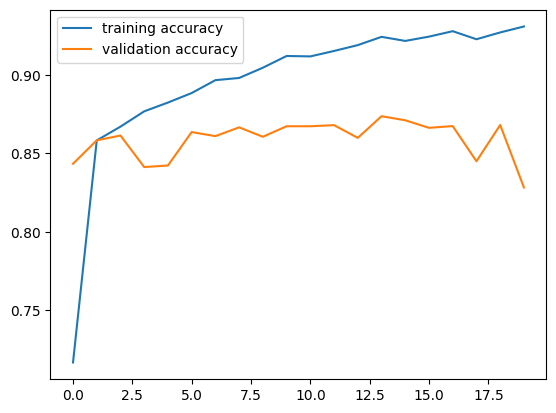

In [42]:
# slightly better model

model = keras.Sequential([
    layers.Dense(128,
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002),
                 activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.3),
    layers.Dense(64,
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002),
                 activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.3),
    layers.Dense(32,
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002),
                 activation=None),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])

# add the compile and fit below
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

# code to plot the loss and accuracy goes here
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()